In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

NegNeg_0 v.s. NegNeg_1: Mann-Whitney-Wilcoxon test two-sided, P_val=6.961e-01 U_stat=2.790e+02
PosNeg_0 v.s. PosNeg_1: Mann-Whitney-Wilcoxon test two-sided, P_val=6.903e-01 U_stat=1.620e+02
PosPos_0 v.s. PosPos_1: Mann-Whitney-Wilcoxon test two-sided, P_val=5.811e-03 U_stat=2.030e+02


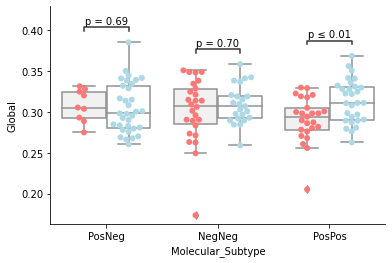

In [2]:
pdf = pd.read_csv('../../masked/patients_info.csv', index_col=0)
pdf['Molecular_Subtype'] = pdf['HER2_Status']+pdf['ER_Status']

gene_beta = pd.read_csv('../../masked/meth.csv', index_col=0)
gene_beta['Molecular_Subtype'] = gene_beta.index.map(pdf['Molecular_Subtype'])
gene_beta['pCR'] = gene_beta.index.map(pdf['pCR'])
gene_beta = gene_beta.dropna(subset=['pCR']).T.dropna().T

import seaborn as sns
from statannot import add_stat_annotation
from itertools import combinations

def swarmplot_anno(x=None, y=None, hue=None, data=None, order=None, hue_order=None,\
                   dodge=False, orient=None, color=None, palette=None, size=5,\
                   edgecolor='gray', linewidth=0, ax=None, cmp_x=True, **kwargs):
    
    ax = sns.swarmplot(x=x, y=y, hue=hue, data=data, order=order, hue_order=hue_order,\
                       dodge=dodge, orient=orient, color=color, palette=palette, size=size,\
                       edgecolor=edgecolor, linewidth=linewidth, ax=ax, **kwargs)
    ax = sns.boxplot(x=x, y=y, hue=hue, color='white')

    add_stat_annotation(ax, x=x, y=y, hue=hue,
                        box_pairs=(((i, k) for k in j) for j in combinations(hue.dropna().unique(),2) for i in x.dropna().unique()),
                        test='Mann-Whitney', text_format='simple', loc='inside', \
                        comparisons_correction=None , verbose=2)
    if cmp_x:
        add_stat_annotation(ax, x=x, y=y,
                            box_pairs=(i for i in combinations(x.dropna().unique(),2)),
                            test='Mann-Whitney', text_format='simple', loc='outside', \
                            comparisons_correction=None , verbose=2)
    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.get_legend().remove()
    
swarmplot_anno(gene_beta['Molecular_Subtype'],gene_beta['Global'],gene_beta['pCR'],dodge=1, \
               palette={0:'#ff7878',1:'lightblue'}, s=6, cmp_x=0)

In [3]:
rna = pd.read_csv('../../masked/rna.csv', index_col=0) #TPM
rna

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
ID,,,,,,,,,,,,,,,,,,,,,
PS001,2.554545,3.375340,0.102582,671.009277,6.477034,0.030823,0.000000,0.000000,0.246188,0.130168,...,1.351429,5.488099,5.980098,13.382974,0.221987,0.0,23.357113,78.242569,0.0,16.917589
PS002,3.973684,8.084476,0.000000,482.736603,11.487203,0.567516,0.167414,0.000000,2.122550,0.709813,...,4.096071,9.684871,11.393213,23.624439,2.115061,0.0,14.649521,117.439857,0.0,39.268021
PS003,2.657011,3.417682,0.026238,151.547119,1.579410,0.041024,0.000000,0.000000,0.031227,0.105220,...,10.572713,3.408053,4.684459,8.854721,3.067032,0.0,8.693533,65.290184,0.0,15.642656
PS004,1.705158,3.331902,0.008057,996.875488,3.210443,0.014332,0.095044,0.000016,0.128665,0.623898,...,1.103520,5.452625,7.929631,14.944577,0.090629,0.0,19.690754,155.475510,0.0,45.001125
PS006,1.863930,3.715610,0.000000,653.799011,1.821601,0.082374,0.060805,0.000000,0.019363,0.108891,...,11.391800,4.558637,5.403933,10.564625,1.198333,0.0,20.389639,138.062851,0.0,18.970005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PS145,1.549966,4.952771,0.000000,259.307098,4.898162,31.927877,0.642495,0.998744,0.242057,0.296059,...,6.398725,3.061711,4.763528,7.707039,0.503232,0.0,11.359871,50.807503,0.0,17.367798
PS146,2.781682,4.861745,0.029085,156.142365,4.307828,1.511595,0.204680,0.194927,0.068489,0.132219,...,11.494687,2.122599,2.952411,14.829761,4.534321,0.0,13.221382,45.656532,0.0,14.674788
PS147,3.986495,6.512741,0.000000,196.518387,2.147338,5.990981,0.123039,0.009727,0.027835,0.104827,...,8.046101,2.888004,5.099798,9.811412,1.319361,0.0,11.972345,99.761963,0.0,14.005712


In [4]:
ref_name = pd.read_table('../../../WGBS/hg38.ncbiRefSeq.gtf',header=None)
geneDict = {}
for i in ref_name[8]:
    rlist = i.split('; ')
    for j in rlist:
        if j[:7]=='gene_id':
            gene = j.split(r'"')[1]
        if j[:13]=='transcript_id':
            tid = j.split(r'"')[1].split(r'.')[0]
    geneDict[tid] = gene 

In [5]:
BRCA_related = sorted(\
                      set(list(pd.read_csv('../../../bionetwork/BRCA_related.genes.csv')\
                               ['core_genes'])+\
                          list(pd.read_csv('../../../bionetwork/BRCA_related.genes.csv')\
                               ['extended_genes'])))
def check_related(x):
    return x in BRCA_related

In [6]:
def diff(pd_df, label, value):
    from scipy.stats import ranksums, ttest_ind
    from sklearn.metrics import roc_auc_score
    
    symbol = []
    mean_case = []
    mean_ctr = []
    median_case = []
    median_ctr = []
    res_ttest = []
    res_rank = []
    res_auc = []
    
    case = pd_df[pd_df[label]==value]
    ctr = pd_df[pd_df[label]!=value]
    
    for i in pd_df.drop(columns=label).columns:
        symbol.append(i)
        mean_case.append(case[i].mean())
        mean_ctr.append(ctr[i].mean())
        median_case.append(case[i].median())
        median_ctr.append(ctr[i].median())
        res_rank.append(ranksums(case[i],ctr[i]).pvalue)
        res_ttest.append(ttest_ind(case[i],ctr[i]).pvalue)
        res_auc.append(roc_auc_score(pd_df[label]==value, pd_df[i]))
        
    all_df = pd.DataFrame()
    all_df['SYMBOL'] = symbol
    all_df['Mean_Case'] = mean_case
    all_df['Mean_Ctr'] = mean_ctr
    all_df['Median_Case'] = median_case
    all_df['Median_Ctr'] = median_ctr
    all_df['Diff_mean'] =  all_df['Mean_Case']-all_df['Mean_Ctr']
    all_df['Diff_median'] =  all_df['Median_Case']-all_df['Median_Ctr']
    all_df['Result_rank'] = res_rank
    all_df['Result_ttest'] = res_ttest
    all_df['Result_auc'] = res_auc
    return all_df

dmres = {}

for i in gene_beta['Molecular_Subtype'].unique():
    dfs = gene_beta.loc[gene_beta['Molecular_Subtype']==i].sort_values('pCR')
    
    sig_c1 = diff(dfs.drop(columns='Molecular_Subtype'), 'pCR', 1)

    sig_c1 = sig_c1.dropna()
    
    sig_c1['GENE'] = sig_c1['SYMBOL'].map(geneDict)
    sig_c1['Related'] = sig_c1['GENE'].apply(check_related)

    dmres[i] = sig_c1.sort_values('Result_rank')

In [7]:
tss_rna_r = {}
tss_rna_p = {}
rna_wgbs_idx = sorted(set.intersection(set(rna.index),set(gene_beta.index)))

rna = rna.loc[rna_wgbs_idx]
gene_beta2 = gene_beta.loc[rna_wgbs_idx].copy()

import scipy.stats as st
for i in geneDict.keys():
    try:
        test = st.spearmanr(rna[geneDict[i]], gene_beta2[i])
        tss_rna_r[i] = test.correlation
        tss_rna_p[i] = test.pvalue
    except:
        pass
for i in gene_beta['Molecular_Subtype'].unique():
    dmres[i]['RNA_R'] = dmres[i]['SYMBOL'].map(tss_rna_r)
    dmres[i]['RNA_p'] = dmres[i]['SYMBOL'].map(tss_rna_p)

PosNeg
1735 710
71 17

NegNeg
1069 411
35 17

PosPos
5834 81
205 7



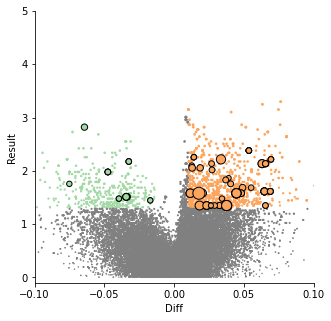

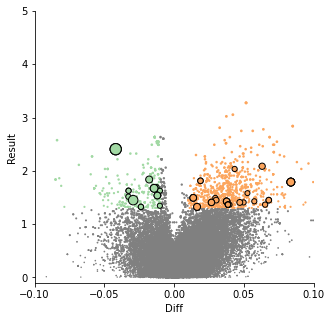

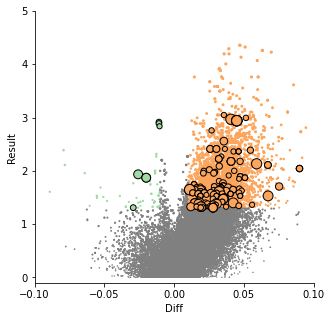

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def color(df):    
    return 1*(df['Result']<0.05)*(df['Diff']>0.01) - 1*(df['Result']<0.05)*(df['Diff']<-0.01) 

def maxone(x):
    return min(x,1)

for i in gene_beta['Molecular_Subtype'].unique():
    sig_c1 = dmres[i].copy()
    sig_c1['Diff'] = sig_c1['Diff_median']
    sig_c1['Result'] = sig_c1['Result_rank'].astype(float)
    
    print(i)
    print((sig_c1.apply(color, axis=1)==1).sum(),(sig_c1.apply(color, axis=1)==-1).sum())
    print((sig_c1.loc[sig_c1['Related']].apply(color, axis=1)==1).sum(),(sig_c1.loc[sig_c1['Related']].apply(color, axis=1)==-1).sum())
    print()
    
    plt.subplots(figsize=[5,5])

    sns.scatterplot(sig_c1['Diff'],\
                    -1*sig_c1['Result'].apply(np.log10),\
                    c=sig_c1.apply(color, axis=1).map({0:'grey',-1:sns.color_palette("Spectral")[-2],1:sns.color_palette("Spectral")[1]}),linewidth=0,\
                   s=2-2*sig_c1['Result'].apply(np.log10))
    
    sns.scatterplot(sig_c1.loc[sig_c1['Related']&(sig_c1.apply(color, axis=1)!=0)]['Diff'],\
                    -1*sig_c1.loc[sig_c1['Related']&(sig_c1.apply(color, axis=1)!=0)]['Result'].apply(np.log10),\
                    color=sig_c1.loc[sig_c1['Related']&(sig_c1.apply(color, axis=1)!=0)].apply(color, axis=1).map({0:'grey',-1:sns.color_palette("Spectral")[-2],1:sns.color_palette("Spectral")[1]}),\
                    linewidth=1,edgecolor='black',\
                    s=25-15*sig_c1.loc[sig_c1['Related']&(sig_c1.apply(color, axis=1)!=0)]['RNA_p'].apply(np.log10))
    
    sns.despine(left=False, bottom=False, right=True, top=True)

    plt.xlim([-0.1,0.1])
    plt.ylim([-0.1,5])
    plt.xticks([-0.1,-0.05,0,0.05,0.1])
    plt.yticks([0,1,2,3,4,5])
    plt.savefig('../figures/DMR_'+str(i)+'.pdf', bbox_inches='tight')

In [9]:
res_csv = dfs.drop(columns='pCR	Molecular_Subtype'.split('\t')).T[[]]
for i in dmres['NegNeg'].columns[1:-5]:
    tmp = dmres['NegNeg'].copy()
    tmp.index = tmp['SYMBOL']
    res_csv[i+'.TNBC'] = res_csv.index.map(tmp[i])
    tmp = dmres['PosNeg'].copy()
    tmp.index = tmp['SYMBOL']
    res_csv[i+'.ER-HER2+'] = res_csv.index.map(tmp[i])
    tmp = dmres['PosPos'].copy()
    tmp.index = tmp['SYMBOL']
    res_csv[i+'.ER+HER2+'] = res_csv.index.map(tmp[i])
    
res_csv.columns = res_csv.columns.str.replace('Ctr','RD').str.replace('Case','pCR')
res_csv.sort_index().to_csv('../result/DMRs.csv')
res_csv.sort_index()

,Mean_pCR.TNBC,Mean_pCR.ER-HER2+,Mean_pCR.ER+HER2+,Mean_RD.TNBC,Mean_RD.ER-HER2+,Mean_RD.ER+HER2+,Median_pCR.TNBC,Median_pCR.ER-HER2+,Median_pCR.ER+HER2+,Median_RD.TNBC,...,Diff_mean.ER+HER2+,Diff_median.TNBC,Diff_median.ER-HER2+,Diff_median.ER+HER2+,Result_rank.TNBC,Result_rank.ER-HER2+,Result_rank.ER+HER2+,Result_ttest.TNBC,Result_ttest.ER-HER2+,Result_ttest.ER+HER2+
Global,0.309191,0.305065,0.313842,0.301899,0.307905,0.291073,0.307184,0.298303,0.311227,0.307754,...,0.022769,-0.000570,-0.007190,0.016830,0.688664,0.679006,0.005658,0.440414,0.793312,0.003054
NM_000014,0.148357,0.162597,0.183542,0.151984,0.154708,0.173749,0.139810,0.159486,0.191875,0.147237,...,0.009793,-0.007428,0.008561,0.024304,0.888475,0.963326,0.116424,0.754362,0.685426,0.354243
NM_000015,0.200778,0.198279,0.205529,0.202733,0.190032,0.191842,0.190779,0.192922,0.190492,0.194110,...,0.013687,-0.003331,0.005494,0.000158,0.794529,0.679006,0.504208,0.851857,0.525350,0.227398
NM_000016,0.140092,0.149043,0.148655,0.136059,0.147579,0.151526,0.138319,0.143803,0.145026,0.131249,...,-0.002870,0.007070,0.000418,-0.007871,0.508546,0.701596,0.683516,0.609452,0.898776,0.670891
NM_000017,0.340684,0.367703,0.367117,0.322062,0.365958,0.336177,0.350938,0.352336,0.373144,0.303669,...,0.030941,0.047269,-0.003449,0.034031,0.173112,0.866116,0.039812,0.356452,0.932146,0.035757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NR_169751,0.121703,0.115366,0.104950,0.115573,0.102409,0.109465,0.115484,0.112827,0.101490,0.113762,...,-0.004515,0.001722,0.010586,0.002552,0.411435,0.051596,0.937777,0.373837,0.061266,0.443748
NR_169752,0.121703,0.115366,0.104950,0.115573,0.102409,0.109465,0.115484,0.112827,0.101490,0.113762,...,-0.004515,0.001722,0.010586,0.002552,0.411435,0.051596,0.937777,0.373837,0.061266,0.443748
NR_169753,0.121703,0.115366,0.104950,0.115573,0.102409,0.109465,0.115484,0.112827,0.101490,0.113762,...,-0.004515,0.001722,0.010586,0.002552,0.411435,0.051596,0.937777,0.373837,0.061266,0.443748
NR_169754,0.121703,0.115366,0.104950,0.115573,0.102409,0.109465,0.115484,0.112827,0.101490,0.113762,...,-0.004515,0.001722,0.010586,0.002552,0.411435,0.051596,0.937777,0.373837,0.061266,0.443748


([<matplotlib.axis.YTick at 0x7ff015cf3c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

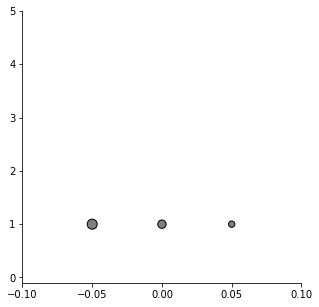

In [12]:
plt.subplots(figsize=[5,5])


sns.scatterplot([-0.05,0,0.05],\
                [1,1,1],\
                color='gray',\
                linewidth=1,edgecolor='black',\
                s=[25-15*np.log10(p) for p in [1e-5,1e-3,1e-1]])

sns.despine(left=False, bottom=False, right=True, top=True)

plt.xlim([-0.1,0.1])
plt.ylim([-0.1,5])
plt.xticks([-0.1,-0.05,0,0.05,0.1])
plt.yticks([0,1,2,3,4,5])
# plt.savefig('../figures/legend.pdf', bbox_inches='tight')

In [13]:
i='PosPos'

pd.concat([

    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Diff_median']<0)&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Result_rank').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Diff_median']>0)&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Result_rank').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])[-3:],
    
])

,SYMBOL,Mean_Case,Mean_Ctr,Median_Case,Median_Ctr,Diff_mean,Diff_median,Result_rank,Result_ttest,Result_auc,GENE,Related,RNA_R,RNA_p
48721,NM_181891,0.090608,0.103078,0.090238,0.101086,-0.012470,-0.010848,0.001215,0.000482,0.242759,UBE2D3,True,-0.083561,0.329857
48717,NM_181887,0.090610,0.103087,0.090238,0.101086,-0.012478,-0.010848,0.001291,0.000479,0.244138,UBE2D3,True,-0.082292,0.337283
11529,NM_001261,0.088056,0.103876,0.087690,0.098100,-0.015819,-0.010410,0.001456,0.002609,0.246897,CDK9,True,0.025428,0.767201
26461,NM_001355216,0.386824,0.426932,0.381158,0.410418,-0.040107,-0.029260,0.048958,0.048406,0.343448,RET,True,0.095393,0.265726
48721,NM_181891,0.090608,0.103078,0.090238,0.101086,-0.012470,-0.010848,0.001215,0.000482,0.242759,UBE2D3,True,-0.083561,0.329857
48717,NM_181887,0.090610,0.103087,0.090238,0.101086,-0.012478,-0.010848,0.001291,0.000479,0.244138,UBE2D3,True,-0.082292,0.337283
21973,NM_001346900,0.286271,0.236344,0.275610,0.239874,0.049927,0.035736,0.000894,0.001271,0.764138,EGFR,True,-0.043784,0.610112
356,NM_000450,0.380740,0.327960,0.373937,0.322452,0.052781,0.051485,0.001011,0.000694,0.761379,SELE,True,0.062209,0.468544
27088,NM_001363825,0.225201,0.179510,0.211978,0.171230,0.045691,0.040749,0.001075,0.000624,0.760000,POLR2F,True,-0.381487,0.000004
10404,NM_001243744,0.457887,0.413332,0.459314,0.392043,0.044554,0.067271,0.007748,0.007218,0.711724,FANCC,True,-0.176756,0.038091


In [14]:
i='PosNeg'

pd.concat([

    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Diff_median']<0)&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Result_rank').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Diff_median']>0)&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Result_rank').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])[-3:],
    
])

,SYMBOL,Mean_Case,Mean_Ctr,Median_Case,Median_Ctr,Diff_mean,Diff_median,Result_rank,Result_ttest,Result_auc,GENE,Related,RNA_R,RNA_p
35213,NM_002559,0.453905,0.515339,0.451154,0.515389,-0.061434,-0.064236,0.001511,0.001183,0.151515,P2RX3,True,0.141075,0.098852
5492,NM_001139466,0.196299,0.234017,0.197798,0.230280,-0.037718,-0.032481,0.006671,0.001137,0.202020,TBL1X,True,-0.075016,0.381872
45558,NM_080591,0.354880,0.401940,0.353651,0.401114,-0.047060,-0.047463,0.010481,0.008437,0.218855,PTGS1,True,-0.085370,0.319462
8359,NM_001186,0.359493,0.447487,0.363918,0.439000,-0.087994,-0.075082,0.017519,0.031565,0.239057,BACH1,True,0.056999,0.506666
35213,NM_002559,0.453905,0.515339,0.451154,0.515389,-0.061434,-0.064236,0.001511,0.001183,0.151515,P2RX3,True,0.141075,0.098852
736,NM_000962,0.354880,0.401940,0.353651,0.401114,-0.047060,-0.047463,0.010481,0.008437,0.218855,PTGS1,True,-0.085370,0.319462
45114,NM_033238,0.173606,0.121911,0.172767,0.119161,0.051695,0.053606,0.004156,0.007119,0.814815,PML,True,-0.067684,0.430238
23183,NM_001350,0.100831,0.086730,0.099632,0.085458,0.014100,0.014173,0.005535,0.004925,0.804714,DAXX,True,-0.056757,0.508475
45120,NM_033249,0.211708,0.144385,0.203022,0.133571,0.067323,0.069450,0.006079,0.010634,0.801347,PML,True,-0.068433,0.425142
34875,NM_002110,0.266191,0.202664,0.267677,0.202125,0.063527,0.065552,0.007315,0.006028,0.794613,HCK,True,-0.120462,0.159319


In [15]:
i='NegNeg'

pd.concat([

    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Diff_median']<0)&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Result_rank').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Diff_median']>0)&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Result_rank').drop_duplicates(subset=['GENE','Diff_mean'])[:3],
    dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])[-3:],
    
])

,SYMBOL,Mean_Case,Mean_Ctr,Median_Case,Median_Ctr,Diff_mean,Diff_median,Result_rank,Result_ttest,Result_auc,GENE,Related,RNA_R,RNA_p
8711,NM_001195132,0.141603,0.175012,0.127141,0.168981,-0.033410,-0.041840,0.003916,0.012122,0.259197,CDKN2A,True,-0.425524,1.963170e-07
47158,NM_152696,0.091052,0.102781,0.089957,0.097460,-0.011729,-0.007503,0.016216,0.037704,0.299331,HIPK1,True,-0.129700,1.294743e-01
16655,NM_001305624,0.091268,0.100889,0.089230,0.101650,-0.009621,-0.012421,0.020132,0.036595,0.306020,CALM2,True,0.000057,9.994699e-01
8711,NM_001195132,0.141603,0.175012,0.127141,0.168981,-0.033410,-0.041840,0.003916,0.012122,0.259197,CDKN2A,True,-0.425524,1.963170e-07
2134,NM_001018055,0.231677,0.270134,0.226647,0.259390,-0.038457,-0.032743,0.030494,0.029253,0.319398,BRCC3,True,-0.041770,6.266546e-01
43527,NM_024332,0.221238,0.260364,0.220155,0.252798,-0.039126,-0.032643,0.023588,0.023507,0.311037,BRCC3,True,-0.035405,6.801483e-01
44086,NM_030768,0.297830,0.259510,0.303692,0.240556,0.038320,0.063137,0.008183,0.045231,0.720736,ILKAP,True,-0.138184,1.060314e-01
12542,NM_001278208,0.419325,0.373494,0.419897,0.376492,0.045832,0.043405,0.009205,0.023806,0.717391,DMC1,True,-0.030391,7.234514e-01
73,NM_000103,0.362160,0.324371,0.349854,0.330930,0.037789,0.018924,0.015349,0.003605,0.702341,CYP19A1,True,0.075436,3.792023e-01
12542,NM_001278208,0.419325,0.373494,0.419897,0.376492,0.045832,0.043405,0.009205,0.023806,0.717391,DMC1,True,-0.030391,7.234514e-01


In [16]:
i='PosPos'
dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)&\
             (dmres[i]['RNA_p']<(0.05/len(set(geneDict.values()))))].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])

,SYMBOL,Mean_Case,Mean_Ctr,Median_Case,Median_Ctr,Diff_mean,Diff_median,Result_rank,Result_ttest,Result_auc,GENE,Related,RNA_R,RNA_p


In [17]:
i='PosNeg'
dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)&\
             (dmres[i]['RNA_p']<(0.05/len(set(geneDict.values()))))].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])

,SYMBOL,Mean_Case,Mean_Ctr,Median_Case,Median_Ctr,Diff_mean,Diff_median,Result_rank,Result_ttest,Result_auc,GENE,Related,RNA_R,RNA_p


In [18]:
i='NegNeg'
dmres[i].loc[dmres[i]['Related']&\
             (dmres[i]['Result_rank']<0.05)&\
             (dmres[i]['Result_ttest']<0.05)&\
             (dmres[i]['RNA_p']<(0.05/len(set(geneDict.values()))))].sort_values('Diff_median').drop_duplicates(subset=['GENE','Diff_mean'])

,SYMBOL,Mean_Case,Mean_Ctr,Median_Case,Median_Ctr,Diff_mean,Diff_median,Result_rank,Result_ttest,Result_auc,GENE,Related,RNA_R,RNA_p
8711,NM_001195132,0.141603,0.175012,0.127141,0.168981,-0.03341,-0.04184,0.003916,0.012122,0.259197,CDKN2A,True,-0.425524,1.963170e-07
